In [1]:
library(ggplot2)

In [2]:
## In this example, the data is in a matrix called data.matrix
## columns are individual samples (i.e. cells)
## rows are measurements taken for all the samples (i.e. genes)

data.matrix <- matrix(nrow=100, ncol=10)
colnames(data.matrix) <- c(paste("wt", 1:5, sep=""), paste("ko", 1:5, sep=""))
rownames(data.matrix) <- paste("gene", 1:100, sep="")

for (i in 1:100) {
  wt.values <- rpois(5, lambda=sample(x=10:1000, size=1))
  ko.values <- rpois(5, lambda=sample(x=10:1000, size=1))
 
  data.matrix[i,] <- c(wt.values, ko.values)
}

In [3]:
head(data.matrix)

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,456,462,467,425,466,51,39,50,45,53
gene2,637,625,670,683,614,191,201,219,179,200
gene3,851,814,834,816,816,826,796,835,836,831
gene4,547,541,527,518,502,903,888,948,906,954
gene5,833,876,865,861,844,478,542,513,526,496
gene6,1003,910,1003,966,940,894,862,893,886,906


In [4]:
dim(data.matrix)

[1] 100  10

In [5]:
## 1) Just for reference, draw a PCA plot using this data...

pca <- prcomp(t(data.matrix), scale=TRUE, center=TRUE) 


## calculate the percentage of variation that each PC accounts for...

pca.var <- pca$sdev^2
pca.var.per <- round(pca.var/sum(pca.var)*100, 1)
pca.var.per

[1] 83.3  3.9  3.6  2.4  2.2  1.5  1.3  1.0  0.7  0.0

In [6]:
## now make a fancy looking plot that shows the PCs and the variation:

pca.data <- data.frame(Sample=rownames(pca$x), X=pca$x[,1], Y=pca$x[,2])
pca.data

,Sample,X,Y
,<chr>,<dbl>,<dbl>
wt1,wt1,-8.321469,3.6075458
wt2,wt2,-8.414237,-1.8232390
wt3,wt3,-9.355061,-2.8180128
wt4,wt4,-8.666935,1.7290088
wt5,wt5,-8.517531,-0.5626741
ko1,ko1,8.658838,0.3304517
ko2,ko2,8.633283,-1.6409490
ko3,ko3,8.515752,2.1215128
ko4,ko4,8.708291,-0.2652123


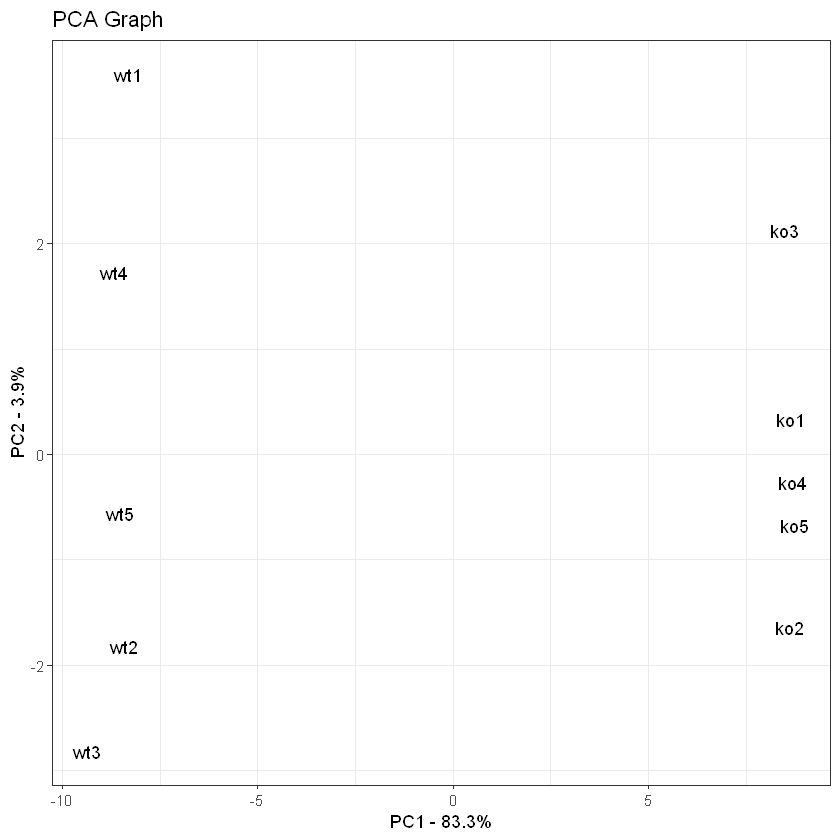

In [7]:
ggplot(data=pca.data, aes(x=X, y=Y, label=Sample)) +
  geom_text() +
  xlab(paste("PC1 - ", pca.var.per[1], "%", sep="")) +
  ylab(paste("PC2 - ", pca.var.per[2], "%", sep="")) +
  theme_bw() +
  ggtitle("PCA Graph")

In [8]:
## 2) Now draw an MDS plot using the same data and the Euclidean distance. This graph should look the same as the PCA plot
 
## first, calculate the distance matrix using the Euclidian distance.
## NOTE: We are transposing, scaling and centering the data just like PCA.

distance.matrix <- dist(scale(t(data.matrix), center=TRUE, scale=TRUE), method="euclidean")

In [9]:
## do the MDS math (this is basically eigen value decomposition)

mds.stuff <- cmdscale(distance.matrix, eig=TRUE, x.ret=TRUE)

In [10]:
## calculate the percentage of variation that each MDS axis accounts for...

mds.var.per <- round(mds.stuff$eig/sum(mds.stuff$eig)*100, 1)
mds.var.per

[1] 83.3  3.9  3.6  2.4  2.2  1.5  1.3  1.0  0.7  0.0

In [11]:
## now make a fancy looking plot that shows the MDS axes and the variation:

mds.values <- mds.stuff$points
mds.data <- data.frame(Sample=rownames(mds.values), X=mds.values[,1], Y=mds.values[,2])
mds.data

,Sample,X,Y
,<chr>,<dbl>,<dbl>
wt1,wt1,-8.321469,3.6075458
wt2,wt2,-8.414237,-1.8232390
wt3,wt3,-9.355061,-2.8180128
wt4,wt4,-8.666935,1.7290088
wt5,wt5,-8.517531,-0.5626741
ko1,ko1,8.658838,0.3304517
ko2,ko2,8.633283,-1.6409490
ko3,ko3,8.515752,2.1215128
ko4,ko4,8.708291,-0.2652123


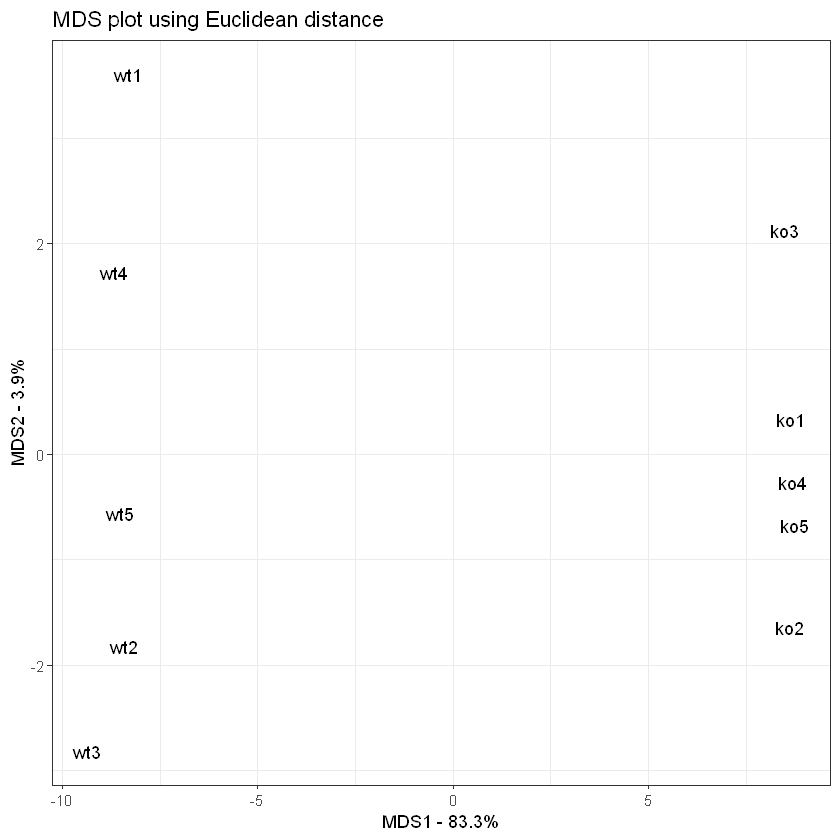

In [12]:
ggplot(data=mds.data, aes(x=X, y=Y, label=Sample)) +
  geom_text() +
  theme_bw() +
  xlab(paste("MDS1 - ", mds.var.per[1], "%", sep="")) +
  ylab(paste("MDS2 - ", mds.var.per[2], "%", sep="")) +
  ggtitle("MDS plot using Euclidean distance")

In [13]:
## 3) Now draw an MDS plot using the same data and the average log(fold change)
##    This graph should look different than the first two
 
## first, take the log2 of all the values in the data.matrix.
## This makes it easy to compute log2(Fold Change) between a gene in two samples since...

## log2(Fold Change) = log2(value for sample 1) - log2(value for sample 2)

log2.data.matrix <- log2(data.matrix)

In [14]:
## now create an empty distance matrix

log2.distance.matrix <- matrix(0,
  nrow=ncol(log2.data.matrix),
  ncol=ncol(log2.data.matrix),
  dimnames=list(colnames(log2.data.matrix),
    colnames(log2.data.matrix)))
 
log2.distance.matrix

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
wt1,0,0,0,0,0,0,0,0,0,0
wt2,0,0,0,0,0,0,0,0,0,0
wt3,0,0,0,0,0,0,0,0,0,0
wt4,0,0,0,0,0,0,0,0,0,0
wt5,0,0,0,0,0,0,0,0,0,0
ko1,0,0,0,0,0,0,0,0,0,0
ko2,0,0,0,0,0,0,0,0,0,0
ko3,0,0,0,0,0,0,0,0,0,0
ko4,0,0,0,0,0,0,0,0,0,0
ko5,0,0,0,0,0,0,0,0,0,0


In [15]:
## now compute the distance matrix using avg(absolute value(log2(FC)))

for(i in 1:ncol(log2.distance.matrix)) {
  for(j in 1:i) {
    log2.distance.matrix[i, j] <-
      mean(abs(log2.data.matrix[,i] - log2.data.matrix[,j]))
  }
}

log2.distance.matrix

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
wt1,0.00000000,0.00000000,0.00000000,0.00000000,0.000000,0.00000000,0.00000000,0.00000000,0.00000000,0
wt2,0.08541658,0.00000000,0.00000000,0.00000000,0.000000,0.00000000,0.00000000,0.00000000,0.00000000,0
wt3,0.09649665,0.09309184,0.00000000,0.00000000,0.000000,0.00000000,0.00000000,0.00000000,0.00000000,0
wt4,0.08913916,0.09385762,0.09193983,0.00000000,0.000000,0.00000000,0.00000000,0.00000000,0.00000000,0
wt5,0.08607076,0.08346505,0.08658665,0.08264893,0.000000,0.00000000,0.00000000,0.00000000,0.00000000,0
ko1,1.23829253,1.24591462,1.27299760,1.25901330,1.249173,0.00000000,0.00000000,0.00000000,0.00000000,0
ko2,1.26733332,1.27410152,1.30156180,1.28484919,1.277746,0.10052196,0.00000000,0.00000000,0.00000000,0
ko3,1.23032137,1.24114919,1.26742654,1.25085068,1.245344,0.08258540,0.10240771,0.00000000,0.00000000,0
ko4,1.26153956,1.26867732,1.29858580,1.28338413,1.275181,0.08496160,0.09627897,0.09804943,0.00000000,0
ko5,1.24780484,1.25469668,1.28335718,1.26886045,1.259352,0.08196762,0.09367882,0.09423364,0.09262732,0


In [16]:
## do the MDS math (this is basically eigen value decomposition)
## cmdscale() is the function for "Classical Multi-Dimensional Scalign"

mds.stuff <- cmdscale(as.dist(log2.distance.matrix), eig=TRUE, x.ret=TRUE)

In [17]:
## calculate the percentage of variation that each MDS axis accounts for...

mds.var.per <- round(mds.stuff$eig/sum(mds.stuff$eig)*100, 1)
mds.var.per

[1] 99.2  0.2  0.2  0.1  0.1  0.1  0.0  0.0  0.0  0.0

In [18]:
## now make a fancy looking plot that shows the MDS axes and the variation:

mds.values <- mds.stuff$points
mds.data <- data.frame(Sample=rownames(mds.values), X=mds.values[,1], Y=mds.values[,2])
mds.data

,Sample,X,Y
,<chr>,<dbl>,<dbl>
wt1,wt1,-0.6156424,-0.002489660
wt2,wt2,-0.6234259,0.041973968
wt3,wt3,-0.6513855,-0.002942103
wt4,wt4,-0.6359309,-0.046567857
wt5,wt5,-0.6281307,0.010910295
ko1,ko1,0.6199150,0.013825031
ko2,ko2,0.6474819,-0.026785576
ko3,ko3,0.6135180,-0.042866973
ko4,ko4,0.6441233,0.030372474


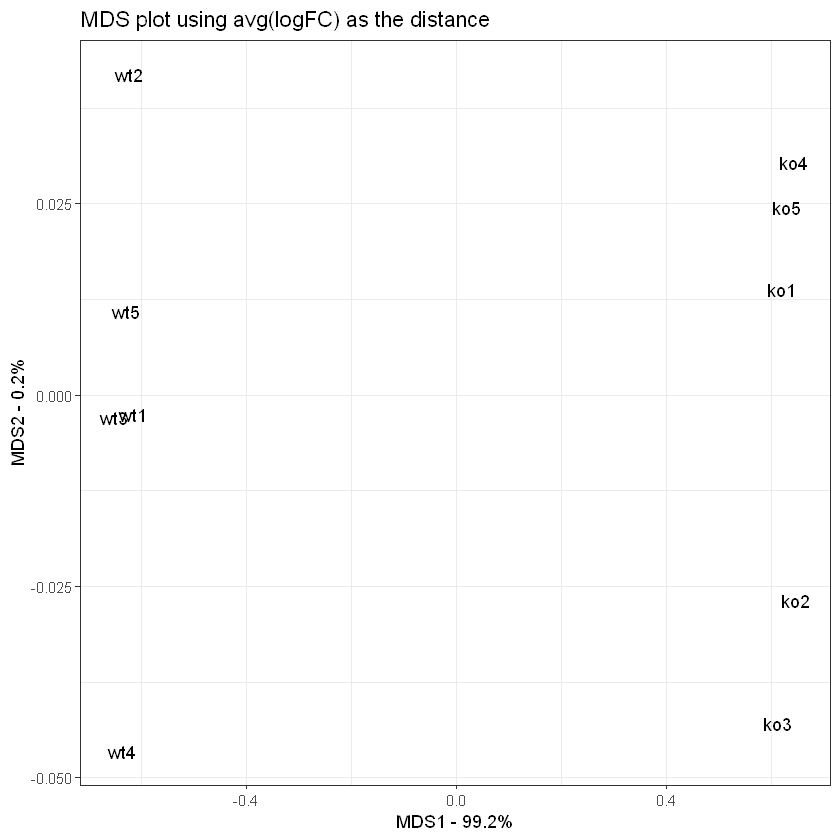

In [19]:
ggplot(data=mds.data, aes(x=X, y=Y, label=Sample)) +
  geom_text() +
  theme_bw() +
  xlab(paste("MDS1 - ", mds.var.per[1], "%", sep="")) +
  ylab(paste("MDS2 - ", mds.var.per[2], "%", sep="")) +
  ggtitle("MDS plot using avg(logFC) as the distance")